In [1]:
!cat game_log_fields.txt

Field(s)  Meaning
    1     Date in the form "yyyymmdd"
    2     Number of game:
             "0" -- a single game
             "1" -- the first game of a double (or triple) header
                    including seperate admission doubleheaders
             "2" -- the second game of a double (or triple) header
                    including seperate admission doubleheaders
             "3" -- the third game of a triple-header
             "A" -- the first game of a double-header involving 3 teams
             "B" -- the second game of a double-header involving 3 teams
    3     Day of week  ("Sun","Mon","Tue","Wed","Thu","Fri","Sat")
  4-5     Visiting team and league
    6     Visiting team game number
          For this and the home team game number, ties are counted as
          games and suspended games are counted from the starting
          rather than the ending date.
  7-8     Home team and league
    9     Home team game number
10-11     Visiting and home team score (unquoted)


In [2]:
import pandas as pd


pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [3]:
game_log = pd.read_csv("game_log.csv",low_memory=False)
park_codes = pd.read_csv("park_codes.csv")
person_codes = pd.read_csv("person_codes.csv")
team_codes = pd.read_csv("team_codes.csv")

In [4]:
tables = [
    'game_log',
    'park_codes',
    'person_codes',
    'team_codes'
]

In [5]:
print(game_log.shape)
print(park_codes.shape)
print(person_codes.shape)
print(team_codes.shape)

(25000, 162)
(252, 9)
(20494, 7)
(150, 8)


In [6]:
print(team_codes.head(3))
print(team_codes.tail(3))

  team_id league  start   end     city         nickname franch_id  seq
0     ALT     UA   1884  1884  Altoona  Mountain Cities       ALT    1
1     ARI     NL   1998     0  Arizona     Diamondbacks       ARI    1
2     BFN     NL   1879  1885  Buffalo           Bisons       BFN    1
    team_id league  start   end        city   nickname franch_id  seq
147     WSN     NL   1892  1899  Washington   Senators       WS9    2
148     WSU     UA   1884  1884  Washington  Nationals       WSU    1
149     MIA     NL   2012     0       Miami    Marlins       FLO    2


In [7]:
print(team_codes[team_codes["team_id"] != team_codes["franch_id"]])

    team_id league  start   end           city         nickname franch_id  seq
6       BLN     NL   1892  1899      Baltimore          Orioles       BL2    2
9       NYA     AL   1903     0       New York          Yankees       BLA    2
16      BRO     NL   1890  1957       Brooklyn          Dodgers       BR3    2
17      LAN     NL   1958     0    Los Angeles          Dodgers       BR3    3
22      BSN     NL   1876  1952         Boston           Braves       BS1    2
23      MLN     NL   1953  1965      Milwaukee           Braves       BS1    3
24      ATL     NL   1966     0        Atlanta           Braves       BS1    4
26      BS2     AA   1891  1891         Boston             Reds       BSP    2
31      CHN     NL   1876     0        Chicago             Cubs       CH2    2
39      CL4     NL   1889  1899      Cleveland          Spiders       CL3    2
46      CIN     NL   1890     0     Cincinnati             Reds       CN2    2
57      HAR     NL   1876  1877       Hartford      

In [8]:
print(list(game_log.columns.values))
print(list(park_codes.columns.values))
print(list(person_codes.columns.values))
print(list(team_codes.columns.values))

['Unnamed: 0', 'date', 'number_of_game', 'day_of_week', 'v_name', 'v_league', 'v_game_number', 'h_name', 'h_league', 'h_game_number', 'v_score', 'h_score', 'length_outs', 'day_night', 'completion', 'forefeit', 'protest', 'park_id', 'attendance', 'length_minutes', 'v_line_score', 'h_line_score', 'v_at_bats', 'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_rbi', 'v_sacrifice_hits', 'v_sacrifice_flies', 'v_hit_by_pitch', 'v_walks', 'v_intentional_walks', 'v_strikeouts', 'v_stolen_bases', 'v_caught_stealing', 'v_grounded_into_double', 'v_first_catcher_interference', 'v_left_on_base', 'v_pitchers_used', 'v_individual_earned_runs', 'v_team_earned_runs', 'v_wild_pitches', 'v_balks', 'v_putouts', 'v_assists', 'v_errors', 'v_passed_balls', 'v_double_plays', 'v_triple_plays', 'h_at_bats', 'h_hits', 'h_doubles', 'h_triples', 'h_homeruns', 'h_rbi', 'h_sacrifice_hits', 'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional_walks', 'h_strikeouts', 'h_stolen_bases', 'h_caught_stealing'

Columns that could relate: 
park_id, hp_umpire_id, winning_pitcher_id, id, team_id, franch_id, v_name, v_league, h/v_game_number, player id

In [9]:
import sqlite3

def run_query(q):
    with sqlite3.connect('mlb.db') as conn:
        return pd.read_sql(q, conn)
    
def run_command(c):
    with sqlite3.connect('mlb.db') as conn:
        conn.isolation_level = None
        conn.execute(c)
        
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

show_tables()

,name,type
0,park_codes,table
1,game_log,table
2,person_codes,table
3,team_codes,table
4,appearance_type,table
5,person,table
6,park,table
7,league,table


In [10]:
try:
    game_log.to_sql('game_log', sqlite3.connect('mlb.db'), index=False)
except ValueError:
    pass

try:
    park_codes.to_sql('park_codes', sqlite3.connect('mlb.db'), index=False)
except ValueError:
    pass

try:
    person_codes.to_sql('person_codes', sqlite3.connect('mlb.db'), index=False)
except ValueError:
    pass

try:    
    team_codes.to_sql('team_codes', sqlite3.connect('mlb.db'), index=False)
except ValueError:
    pass

/Users/ChristianBarrera/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [11]:
show_tables()

,name,type
0,park_codes,table
1,game_log,table
2,person_codes,table
3,team_codes,table
4,appearance_type,table
5,person,table
6,park,table
7,league,table


In [12]:
print(game_log.head())

q = '''
SELECT 

;'''

   Unnamed: 0      date  number_of_game day_of_week v_name v_league  \
0           0  18710504               0         Thu    CL1      NaN   
1           1  18710505               0         Fri    BS1      NaN   
2           2  18710506               0         Sat    CL1      NaN   
3           3  18710508               0         Mon    CL1      NaN   
4           4  18710509               0         Tue    BS1      NaN   

   v_game_number h_name h_league  h_game_number  v_score  h_score  \
0              1    FW1      NaN              1        0        2   
1              1    WS3      NaN              1       20       18   
2              2    RC1      NaN              1       12        4   
3              3    CH1      NaN              1       12       14   
4              2    TRO      NaN              1        9        5   

   length_outs day_night  completion forefeit  protest park_id  attendance  \
0         54.0         D         NaN      NaN      NaN   FOR01       200.0   
1 

In [13]:
c = '''
ALTER TABLE game_log
ADD COLUMN game_id
;'''

try:
    run_command(c)
except:
    pass



In [14]:
q = '''
select game_id from game_log
limit 10
;'''

run_query(q)

,game_id
0,FW1187105040
1,WS3187105050
2,RC1187105060
3,CH1187105080
4,TRO187105090
5,CL1187105110
6,CL1187105130
7,FW1187105130
8,FW1187105150
9,BS1187105160


In [15]:
c = '''
UPDATE game_log
SET game_id = h_name || date || number_of_game
WHERE game_id IS NULL
;'''

try:
    run_command(c)
except:
    pass



In [16]:
q = """
SELECT
    game_id,
    date,
    h_name,
    number_of_game
FROM game_log
LIMIT 5;
"""

run_query(q)

,game_id,date,h_name,number_of_game
0,FW1187105040,18710504,FW1,0
1,WS3187105050,18710505,WS3,0
2,RC1187105060,18710506,RC1,0
3,CH1187105080,18710508,CH1,0
4,TRO187105090,18710509,TRO,0


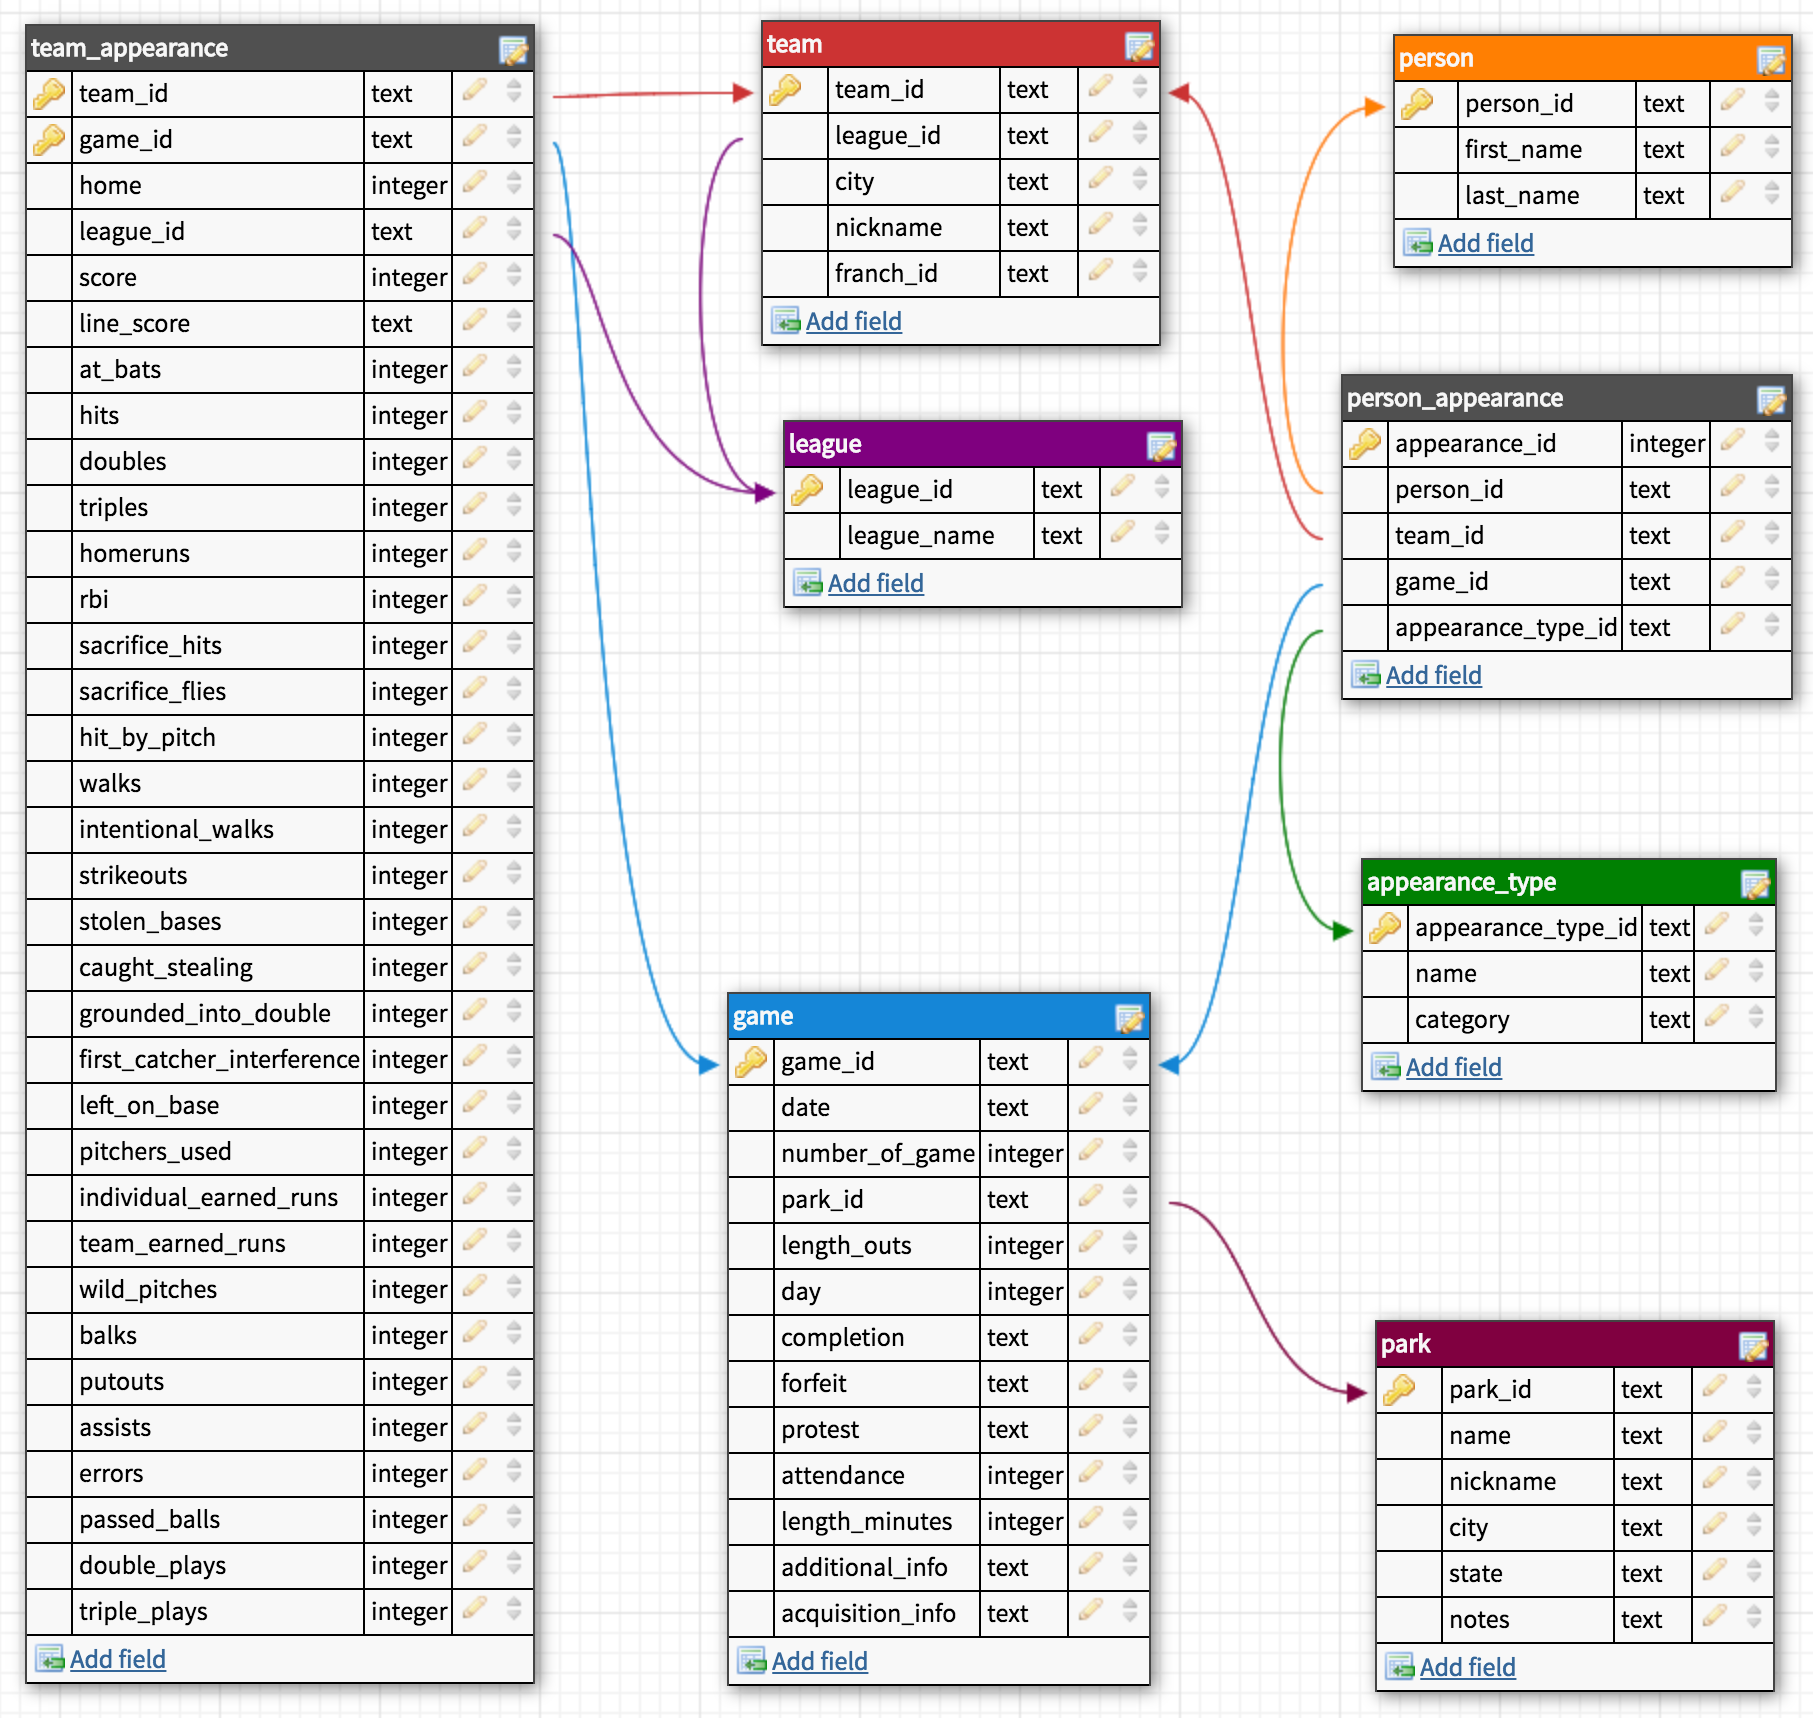

Figure 1: DataQuest Labs, https://raw.githubusercontent.com/dataquestio/solutions/203550c7967c3122edb40ae91431b3d0de52b9aa/images/schema-screenshot.png

In [17]:
appearance_type = pd.read_csv('appearance_type.csv')

In [18]:
try:
    appearance_type.to_sql('appearance_type', sqlite3.connect('mlb.db'), index=False)
except ValueError:
    pass

In [19]:
q = '''
SELECT * FROM person_codes limit 10
;'''

run_query(q)

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,None,None,None
1,aaroh101,Aaron,Hank,04/13/1954,None,None,None
2,aarot101,Aaron,Tommie,04/10/1962,None,04/06/1979,None
3,aased001,Aase,Don,07/26/1977,None,None,None
4,abada001,Abad,Andy,09/10/2001,None,None,None
5,abadf001,Abad,Fernando,07/28/2010,None,None,None
6,abadj101,Abadie,John,04/26/1875,None,None,None
7,abbae101,Abbaticchio,Ed,09/04/1897,None,None,None
8,abbeb101,Abbey,Bert,06/14/1892,None,None,None
9,abbec101,Abbey,Charlie,08/16/1893,None,None,07/21/1897


In [20]:
create_table = '''
CREATE TABLE person (
person_id TEXT PRIMARY KEY,
first_name TEXT,
last_name TEXT
)
;'''

try:
    run_command(create_table)
except:
    pass

c_insert_data = '''
INSERT INTO person
SELECT id, first, last FROM person_codes
;'''

try:
    run_command(c_insert_data)
except:
    pass

In [21]:
q = '''
select * from person limit 10
;'''

run_query(q)

,person_id,first_name,last_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad
5,abadf001,Fernando,Abad
6,abadj101,John,Abadie
7,abbae101,Ed,Abbaticchio
8,abbeb101,Bert,Abbey
9,abbec101,Charlie,Abbey


In [22]:
q = '''
select * from park_codes limit 10
;'''

run_query(q)

,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,None,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,04/30/1884,05/31/1884,UA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,None,AL,None
3,ARL01,Arlington Stadium,None,Arlington,TX,04/21/1972,10/03/1993,AL,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,None,AL,None
5,ATL01,Atlanta-Fulton County Stadium,None,Atlanta,GA,04/12/1966,09/23/1996,NL,None
6,ATL02,Turner Field,None,Atlanta,GA,04/04/1997,10/02/2016,NL,None
7,ATL03,Suntrust Park,None,Atlanta,GA,04/14/2017,None,NL,None
8,BAL01,Madison Avenue Grounds,None,Baltimore,MD,07/08/1871,07/08/1871,None,WS3
9,BAL02,Newington Park,None,Baltimore,MD,04/22/1872,09/30/1882,None,BL1:1872-74; BL4:1873; BL2: 1882


In [23]:
create_table = '''
CREATE TABLE park (
    park_id TEXT PRIMARY KEY,
    name TEXT,
    nickname TEXT,
    city TEXT,
    state TEXT,
    notes TEXT
)
;'''

try:
    run_command(create_table)
except:
    print("Unsuccessful1")

c_insert_data = '''
INSERT OR IGNORE INTO park
SELECT park_id, name, aka, city, state, notes FROM park_codes
;'''

try:
    run_command(c_insert_data)
except:
    print("Unsuccessful2")

q = '''
select * from park limit 10
;'''

run_query(q)

Unsuccessful1


,park_id,name,nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None
5,ATL01,Atlanta-Fulton County Stadium,None,Atlanta,GA,None
6,ATL02,Turner Field,None,Atlanta,GA,None
7,ATL03,Suntrust Park,None,Atlanta,GA,None
8,BAL01,Madison Avenue Grounds,None,Baltimore,MD,WS3
9,BAL02,Newington Park,None,Baltimore,MD,BL1:1872-74; BL4:1873; BL2: 1882


In [24]:
create_table = '''
CREATE TABLE IF NOT EXISTS league (
    league_id TEXT PRIMARY KEY,
    league_name TEXT
)
;'''

run_command(create_table)

c_insert_data = '''
INSERT OR IGNORE INTO league
VALUES
    ("NL", "National League"),
    ("AL", "American League"),
    ("AA", "American Association"),
    ("FL", "Federal League"),
    ("PL", "Players League"),
    ("UA", "Union Association")
;'''

run_command(c_insert_data)

q = '''
select * from league
;'''

run_query(q)

,league_id,league_name
0,NL,National League
1,AL,American League
2,AA,American Association
3,FL,Federal League
4,PL,Players League
5,UA,Union Association


In [25]:
appearance_type.head()

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense


In [26]:
try:
    appearance_type.to_sql('appearance_type', sqlite3.connect('mlb.db'), index=False)
except ValueError:
    pass

q = '''
select * from appearance_type
;'''

run_query(q)

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


In [27]:
show_tables()

,name,type
0,park_codes,table
1,game_log,table
2,person_codes,table
3,team_codes,table
4,appearance_type,table
5,person,table
6,park,table
7,league,table
